# Descuentos: SOLUCIONES

## Ej1. Lectura de ficheros (2 ptos.)

Junto al enunciado se han distribuido dos ficheros "Meses.txt" y "Descuentos.txt". "Meses.txt" contiene los diferentes meses del año y un identificador de descuento para cada uno. "Descuentos.txt" contiene el importe exacto de cada descuento.

Se pide:

1. Leer el fichero "Meses.txt" y generar un diccionario llamado "dic_month" en el que las claves sean los nombres de los meses y los valores el identificador del descuento:

        {'Enero': 'd1',
         'Febrero': 'd3',....}

2. Leer el fichero "Descuentos.txt" y generar un diccionario llamado "dic_discount" en el que las claves sean los identificadores de descuento y el valor sea el valor numérico de dicho descuento:

        {'d0': 0.0, 
         'd1': 10.0,....}


In [1]:
dic_month ={}

with open("Meses.txt", "r") as f:
    header= f.readline().split(";")
    for row in f:
        id_mes, mes, desc_id =row.split(";")
        dic_month[mes] = desc_id.replace('\n','')

dic_month

{'Enero': 'd1',
 'Febrero': 'd3',
 'Marzo': 'd0',
 'Abril': 'd2',
 'Mayo': 'd1',
 'Junio': 'd3',
 'Julio': 'd0',
 'Agosto': 'd2',
 'Septiembre': 'd3',
 'Octubre': 'd4',
 'Noviembre': 'd5',
 'Diciembre': 'd2'}

In [45]:
dic_discount ={}

with open("Descuentos.txt", "r") as f:
    header= f.readline().split("^")
    for row in f:
        desc_id, desc, value =row.split("^")
        dic_discount[desc_id] = float(value)

dic_discount

{'d0': 0.0, 'd1': 10.0, 'd2': 20.0, 'd3': 25.0, 'd4': 15.0, 'd5': 12.0}

## Ej2. Combinar diccionarios (2 ptos.)

Utilizar los diccionarios generados en el apartado anterior (si no se ha conseguido, definirlos a mano) para construir un nuevo diccionario llamado "dic_final" en el que las claves sean el nombre de los meses del año y el valor sea una tupla en el que el primer elemento sea el identificador del descuento y el segundo elemento sea el importe exacto de cada descuento:

        {'Enero': ("d1", 10.0),
         'Febrero': ("d3", 25.0) ,....}

In [46]:
dic_final={}
for mes,desc_id in dic_month.items():
    dic_final[mes]=(desc_id, dic_discount[desc_id])
dic_final   

{'Enero': ('d1', 10.0),
 'Febrero': ('d3', 25.0),
 'Marzo': ('d0', 0.0),
 'Abril': ('d2', 20.0),
 'Mayo': ('d1', 10.0),
 'Junio': ('d3', 25.0),
 'Julio': ('d0', 0.0),
 'Agosto': ('d2', 20.0),
 'Septiembre': ('d3', 25.0),
 'Octubre': ('d4', 15.0),
 'Noviembre': ('d5', 12.0),
 'Diciembre': ('d2', 20.0)}

## Ej3. Salvar a fichero  (1 pto.)

Utilizar el diccionario generado en el apartado anterior (si no se ha conseguido, definirlo a mano), para salvar su información en un fichero de tipo CSV llamado "Mes-Descuentos.csv", cuya primera línea debe incluir una cabecera con los nombres "mes","id_descuento","valor". Y el separador debe ser el caracter "|":

        mes|id_descuento|valor
        Enero|d1|10.0
        Febrero|d3|25.0

In [47]:
with open("Mes-Descuentos.csv", "w") as f:
    f.write("mes|id_descuento|valor\n")
    for mes,(id_d,valor) in dic_final.items():
        f.write("|".join([mes,id_d,str(valor)+'\n']))

## Ej4. Genera cualquier polinomio  (2 ptos.)

Preguntar al usuario por el grado del polinomio que quiere pintar. A continuacion, el código debe preguntar al usuario por tantos coeficientes como grado tenga el polinomio. El código debe funcionar para cualquier grado (no es necesario chequear si el usuario introduce grados negativos o letras o símbolos). Al final, el código debe imprimir la función solicitada por el usuario:


        Introduzca el grado del polinomio: 3
          - Introduzca el coeficiente grado 0:0
          - Introduzca el coeficiente grado 1:1
          - Introduzca el coeficiente grado 2:2
          - Introduzca el coeficiente grado 3:3
        El polinomio solicitado es: 
        3x^3+2x^2+1x^1+0

In [48]:
grado=int(input("Introduzca el grado del polinomio: "))
coeficientes=[]
for i in range(grado+1):
    tmp=int(input("  - Introduzca el coeficiente grado "+str(i)+":"))
    coeficientes.append(tmp)
print("El polinomio solicitado es: ")

print("f(x)=",end="")
for i in range(grado+1):
    if i!=grado:
        print(str(coeficientes[grado-i])+"x^"+str(grado-i)+"+",end="")
    else:
        print(coeficientes[grado-i])

Introduzca el grado del polinomio: 3
  - Introduzca el coeficiente grado 0:0
  - Introduzca el coeficiente grado 1:1
  - Introduzca el coeficiente grado 2:2
  - Introduzca el coeficiente grado 3:3
El polinomio solicitado es: 
f(x)=3x^3+2x^2+1x^1+0


## Ej5. Calcula el polinomio  (2 ptos.)

Construye una función que responda a esta difinición:

        def apply_polynomio(ejex,coeficientes):
            ...
            ...
        return ejey
        
Dónde la variable "ejex" reciba una lista de valores y la variable "coeficientes" reciba la lista de coeficientes seleccionados por el usuario (no es necesario haber realizado el apartado anterior para hacer este ejercicio).
La variable devuelta "ejey" debe ser una lista de valores resultado de aplicar el polinomio definido por los coeficientes a cada uno de los valores de la lista "ejex".

In [49]:
import numpy as np
def apply_polynomio(ejex,coeficientes):
    ejey=[]
    for x in ejex:
        value=0
        for i in range(len(coeficientes)):
            if i==0:
                value=value+coeficientes[i]
            else:
                value=value+coeficientes[i]*np.power(x,i)
        ejey.append(value)
    return ejey

In [50]:
ejex=[0,1,2,3]
ejey=apply_polynomio([0,1,2,3],[1,2,3,4])
ejey

[1, 10, 49, 142]

## Ej6. Visualiza el polinomio  (1 pto.)

Construye una función con la siguiente definición:
    
    def plot_polynomio(ejex,ejey,kind):

Que visualice la función descrita por las listas de valores "ejex" y "ejey". El tipo de gráfico utilizado dependerá del parámetro "kind" que puede tomar los siguientes valores:

    kind="line"
    kind="scatter"
    kind="bar"
    
Cuando la varibale "kind" tome el valor "line" imprimirá el polinomio con una línea contínua negra utilizando cruces para las marcas.  
Cuando la varible "kind" tome el valor "scatter" imprimirá el polinomio como una sucesión de puntos con forma circular de color rojo.  
Cuando la variable "kind" tome el valor "bar" imprimirá el polinomio como un diagrama de barras verticales de color magenta.
Cuando la variable "kind" no reciba ningún valor por parte del usuario, por defecto, tomará el valor "line".
Cuando la variable "kind" reciba un valor no reconocible, por defecto, tomará el valor "line"

In [1]:
import matplotlib.pyplot as plt
def plot_polynomio(ejex,ejey,kind="line"):
    if kind=="scatter":
        plt.scatter(ejex,ejey,marker="o",c="r")
    elif kind=="bar":
        plt.bar(ejex,ejey,color="magenta",alpha=0.5)
    else:
        plt.plot(ejex,ejey,"k-+")

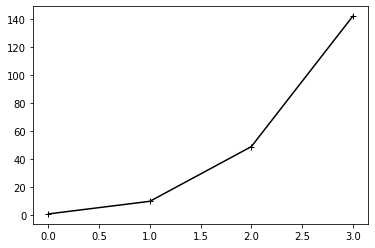

In [52]:
plot_polynomio([0,1,2,3],[1, 10, 49, 142])

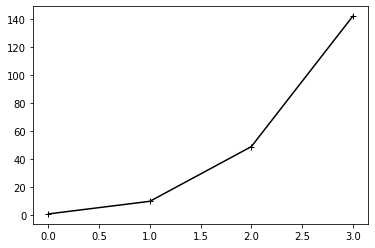

In [2]:
plot_polynomio([0,1,2,3],[1, 10, 49, 142],kind="cualquiercosa")

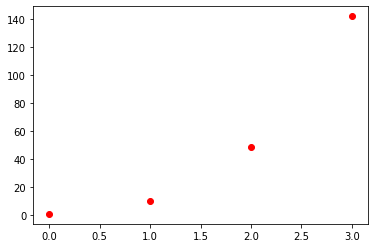

In [53]:
plot_polynomio([0,1,2,3],[1, 10, 49, 142],"scatter")

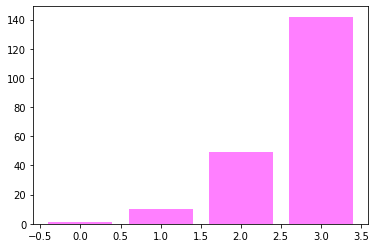

In [54]:
plot_polynomio([0,1,2,3],[1, 10, 49, 142],"bar")